In [103]:
#import necessary libraries and python scripts
import numpy as np
import pandas as pd

from pydataset import data

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree, export_text
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from acquire import get_telco_data

In [104]:
# read telco data into a DataFrame
df = get_telco_data()
df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,3,0016-QLJIS,Female,0,Yes,Yes,65,Yes,...,Yes,Yes,Yes,Yes,90.45,5957.9,No,Two year,DSL,Mailed check
1,4,1,3,0017-DINOC,Male,0,No,No,54,No,...,Yes,Yes,No,No,45.20,2460.55,No,Two year,DSL,Credit card (automatic)
2,3,1,3,0019-GFNTW,Female,0,No,No,56,No,...,Yes,No,No,No,45.05,2560.1,No,Two year,DSL,Bank transfer (automatic)
3,4,1,3,0056-EPFBG,Male,0,Yes,Yes,20,No,...,Yes,No,No,Yes,39.40,825.4,No,Two year,DSL,Credit card (automatic)
4,3,1,3,0078-XZMHT,Male,0,Yes,No,72,Yes,...,Yes,Yes,Yes,Yes,85.15,6316.2,No,Two year,DSL,Bank transfer (automatic)


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [106]:
#Imagine having an X_train as well as an X_train_scaled_encoded

#handle in prep before the split:
# data type preparation (ex. converting strings to numbers, etc...)
# dropping rows/columns (if too many nulls)
# handle outliers (decide if you're keeping/removing them)
# adding new columns
# dropping any columns

In [107]:
df.isnull().value_counts()

payment_type_id  internet_service_type_id  contract_type_id  customer_id  gender  senior_citizen  partner  dependents  tenure  phone_service  multiple_lines  online_security  online_backup  device_protection  tech_support  streaming_tv  streaming_movies  paperless_billing  monthly_charges  total_charges  churn  contract_type  internet_service_type  payment_type
False            False                     False             False        False   False           False    False       False   False          False           False            False          False              False         False         False             False              False            False          False  False          False                  False           7043
dtype: int64

In [108]:
#There are no null values to handle in any columns. 

#I want to drop customers with a tenure less than one month. Since they have not yet had the chance to stay or leave, thier info would not give our model relevant data.

df[df.tenure == 0]

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
85,4,1,3,1371-DWPAZ,Female,0,Yes,Yes,0,No,...,Yes,Yes,No,No,56.05,,No,Two year,DSL,Credit card (automatic)
156,3,1,3,2775-SEFEE,Male,0,No,Yes,0,Yes,...,Yes,No,No,Yes,61.90,,No,Two year,DSL,Bank transfer (automatic)
236,2,1,3,4075-WKNIU,Female,0,Yes,Yes,0,Yes,...,Yes,Yes,No,No,73.35,,No,Two year,DSL,Mailed check
255,3,1,3,4472-LVYGI,Female,0,Yes,Yes,0,No,...,Yes,Yes,No,Yes,52.55,,No,Two year,DSL,Bank transfer (automatic)
339,2,1,3,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,...,No,Yes,Yes,No,80.85,,No,Two year,DSL,Mailed check
5681,2,3,3,2520-SGTTA,Female,0,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No,20.00,,No,Two year,None,Mailed check
5717,2,3,3,3115-CZMZD,Male,0,No,Yes,0,Yes,...,No internet service,No internet service,No internet service,No,20.25,,No,Two year,None,Mailed check
5727,2,3,3,3213-VVOLG,Male,0,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No,25.35,,No,Two year,None,Mailed check
5798,2,3,3,4367-NUYAO,Male,0,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No,25.75,,No,Two year,None,Mailed check
6007,2,3,3,7644-OMVMY,Male,0,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No,19.85,,No,Two year,None,Mailed check


In [109]:
df.loc[:, df.isnull().any()].columns

Index([], dtype='object')

In [110]:
#In order to prep the data for modeling:
#I will drop rows shown in the above table result (customers with less than one month of tenure).
#I will drop unnecessary columns: payment_type_id, internet_service_type_id, contract_type_id, and customer_id
#I will convert columns with string values into multiple columns using the values as new column labels, and values as booleans.
#Finally, I will store the functions to do the above in a prepare.py file for streamlined access in my final notebook.


In [111]:
#dropping rows shown in table above, or in other words excluding the rows where tenure == 0

df = df[df.tenure != 0]
df.shape


(7032, 24)

In [112]:
#checking to make sure there are no rows with customers whose tenure is less than 1 month

df[df.tenure == 0]

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type


In [113]:
#dropping unneccessary columns
#'payment_type_id', 'internet_service_type_id', 'contract_type_id', 'customer_id'

columns_to_drop = ['payment_type_id', 'internet_service_type_id', 'contract_type_id', 'customer_id', 'phone_service']
df = df.drop(columns=columns_to_drop)
df.head()

,gender,senior_citizen,partner,dependents,tenure,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,Female,0,Yes,Yes,65,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,90.45,5957.9,No,Two year,DSL,Mailed check
1,Male,0,No,No,54,No phone service,Yes,No,No,Yes,Yes,No,No,45.20,2460.55,No,Two year,DSL,Credit card (automatic)
2,Female,0,No,No,56,No phone service,Yes,Yes,Yes,Yes,No,No,No,45.05,2560.1,No,Two year,DSL,Bank transfer (automatic)
3,Male,0,Yes,Yes,20,No phone service,Yes,No,Yes,Yes,No,No,Yes,39.40,825.4,No,Two year,DSL,Credit card (automatic)
4,Male,0,Yes,No,72,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,85.15,6316.2,No,Two year,DSL,Bank transfer (automatic)


In [71]:
#Before I start to convert my columns, I want to check their values. This will help me know how to handle them.


In [72]:
df.gender.value_counts()

Male      3549
Female    3483
Name: gender, dtype: int64

In [74]:
df.partner.value_counts()

No     3639
Yes    3393
Name: partner, dtype: int64

In [75]:
df.dependents.value_counts()

No     4933
Yes    2099
Name: dependents, dtype: int64

In [114]:
#df.phone_service.value_counts()  commented out bc column has been dropped after initial explore.  
#results were redundant with multiple_lines column. Yes: 6352, No: 680

In [115]:
df.multiple_lines.value_counts()

No                  3385
Yes                 2967
No phone service     680
Name: multiple_lines, dtype: int64

In [116]:
#The value "no phone service" seems to be redundant here. I can go back and add the 'phone_service' column to the drop_columns list.

In [117]:
df.online_security.value_counts()

No                     3497
Yes                    2015
No internet service    1520
Name: online_security, dtype: int64

In [118]:
df.online_backup.value_counts()

No                     3087
Yes                    2425
No internet service    1520
Name: online_backup, dtype: int64

In [119]:
df.device_protection.value_counts()

No                     3094
Yes                    2418
No internet service    1520
Name: device_protection, dtype: int64

In [120]:
#I can likely combine these features to be one column like internet_protection_services


In [121]:
df.tech_support.value_counts()

No                     3472
Yes                    2040
No internet service    1520
Name: tech_support, dtype: int64

In [122]:
df.streaming_tv.value_counts()

No                     2809
Yes                    2703
No internet service    1520
Name: streaming_tv, dtype: int64

In [123]:
df.streaming_movies.value_counts()

No                     2781
Yes                    2731
No internet service    1520
Name: streaming_movies, dtype: int64

In [124]:
#the streaming services are not for a fee, so it makes sense to combine them into one streaming column. 

In [125]:
df.paperless_billing.value_counts()

Yes    4168
No     2864
Name: paperless_billing, dtype: int64

In [126]:
df.contract_type.value_counts()

Month-to-month    3875
Two year          1685
One year          1472
Name: contract_type, dtype: int64

In [127]:
df.internet_service_type.value_counts()

Fiber optic    3096
DSL            2416
None           1520
Name: internet_service_type, dtype: int64

In [128]:
df.payment_type.value_counts()

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: payment_type, dtype: int64

In [129]:
#The columns look pretty straight forward to handle.  I'll visualize first with dropped columns, 
#then after I visualize, I'll convert and encode columns containing strings.
df.describe()

,senior_citizen,tenure,monthly_charges
count,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208
std,0.368844,24.545260,30.085974
min,0.000000,1.000000,18.250000
25%,0.000000,9.000000,35.587500
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.862500
max,1.000000,72.000000,118.750000


In [130]:
#the above shows me that "total_charges" is not in a numeric datatype

df.total_charges

0        5957.9
1       2460.55
2        2560.1
3         825.4
4        6316.2
         ...   
7038      20.05
7039     367.55
7040     129.55
7041       18.9
7042       85.5
Name: total_charges, Length: 7032, dtype: object

In [131]:
df.total_charges = df.total_charges.astype(float)
df.total_charges

0       5957.90
1       2460.55
2       2560.10
3        825.40
4       6316.20
         ...   
7038      20.05
7039     367.55
7040     129.55
7041      18.90
7042      85.50
Name: total_charges, Length: 7032, dtype: float64

In [132]:
df.describe()

,senior_citizen,tenure,monthly_charges,total_charges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


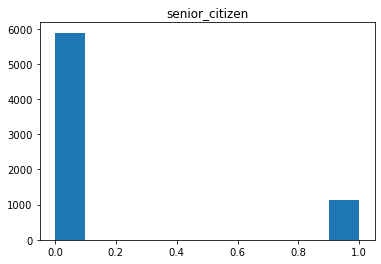

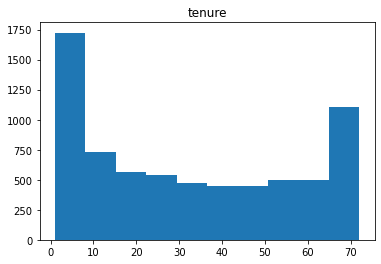

In [135]:
num_cols = df.columns[[df[col].dtype == 'int64' for col in df.columns]]
for col in num_cols:
    plt.hist(df[col])
    plt.title(col)
    plt.show()

In [137]:
df.senior_citizen.value_counts()

0    5890
1    1142
Name: senior_citizen, dtype: int64

In [136]:
obj_cols = df.columns[[df[col].dtype == 'O' for col in df.columns]]
for col in obj_cols:
    print(df[col].value_counts())
    print(df[col].value_counts(normalize=True, dropna=False))
    print('----------------------')

Male      3549
Female    3483
Name: gender, dtype: int64
Male      0.504693
Female    0.495307
Name: gender, dtype: float64
----------------------
No     3639
Yes    3393
Name: partner, dtype: int64
No     0.517491
Yes    0.482509
Name: partner, dtype: float64
----------------------
No     4933
Yes    2099
Name: dependents, dtype: int64
No     0.701507
Yes    0.298493
Name: dependents, dtype: float64
----------------------
No                  3385
Yes                 2967
No phone service     680
Name: multiple_lines, dtype: int64
No                  0.481371
Yes                 0.421928
No phone service    0.096701
Name: multiple_lines, dtype: float64
----------------------
No                     3497
Yes                    2015
No internet service    1520
Name: online_security, dtype: int64
No                     0.497298
Yes                    0.286547
No internet service    0.216155
Name: online_security, dtype: float64
----------------------
No                     3087
Yes        

In [ ]:
#at a glance with the summaries for each column, they appear to be fairly evenly distributed
#exception: month to month customers far outweigh one and two-year customers, much more customers do not have dependents, and less than 10% of customers do not have phone service

In [101]:
#create dummy columns for ['senior_citizen', 'gender', 'partner', 'dependents', phone_service', 'paperless_billing', 'churn']

In [147]:
df.head(3)

,gender,senior_citizen,partner,dependents,tenure,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,Female,0,Yes,Yes,65,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,90.45,5957.90,No,Two year,DSL,Mailed check
1,Male,0,No,No,54,No phone service,Yes,No,No,Yes,Yes,No,No,45.20,2460.55,No,Two year,DSL,Credit card (automatic)
2,Female,0,No,No,56,No phone service,Yes,Yes,Yes,Yes,No,No,No,45.05,2560.10,No,Two year,DSL,Bank transfer (automatic)
